# Amazon product review sentiment analysis 

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import random
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS 
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle


In [198]:
reviews = pd.read_csv('amazon_reviews_sample.csv',index_col=0)

In [199]:
reviews

score  \
0         1   
1         1   
2         1   
3         1   
4         1   
...     ...   
9995      1   
9996      1   
9997      0   
9998      0   
9999      1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                               Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n  
1                                                                                                                                                                                                                                                                                                                                                                            The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\r\n  
2                                                                                                                 Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you've played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time's Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears soundtrack, so I can't say for sure), and even if you've never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.\r\n  
3                                                                                                                                  Excellent Soundtrack: I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and

In [200]:
reviews['score'].value_counts()

0    5097
1    4903
Name: score, dtype: int64

In [201]:
reviews.shape

(10000, 2)

In [202]:
positive_reviews = reviews[reviews['score']==1]['review']
negative_reviews = reviews[reviews['score']==0]['review']

In [203]:
positive_reviews.head()

0                                                                                                                                                                                                                                                                                                                                                   Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n
1                                                                                                                                                                                                                                    

In [204]:
negative_reviews[13] 

" Oh please: I guess you have to be a romance novel lover for this one, and not a very discerning one. All others beware! It is absolute drivel. I figured I was in trouble when a typo is prominently featured on the back cover, but the first page of the book removed all doubt. Wait - maybe I'm missing the point. A quick re-read of the beginning now makes it clear. This has to be an intentional churning of over-heated prose for satiric purposes. Phew, so glad I didn't waste $10.95 after all.\r\n"

### Word Cloud

In [206]:
stopwords_set = set(stopwords.words('english'))

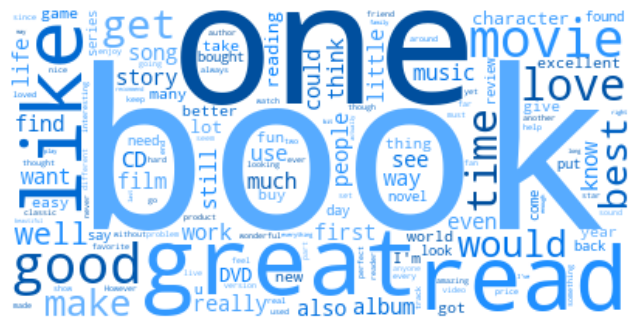

In [207]:
def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(210, 100%, {random.randint(30, 70)}%)" 
    
text_p = " ".join(text for text in positive_reviews)

wordcloud_p = WordCloud(stopwords=stopwords_set, color_func=blue_color_func, background_color="white").generate(text_p)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud_p, interpolation='bilinear')  
plt.axis("off") 
plt.show()

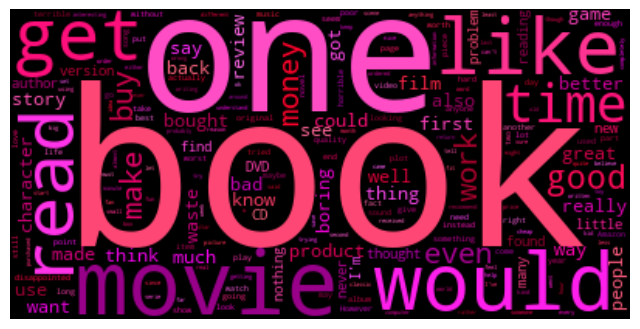

In [208]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({random.randint(300, 350)}, 100%, {random.randint(30, 70)}%)" 
    
text_n = " ".join(text for text in negative_reviews)

wordcloud_n = WordCloud(stopwords=stopwords_set, color_func=color_func).generate(text_n)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud_n, interpolation='bilinear')  
plt.axis("off") 
plt.show()

### Text preprocessing

In [210]:
stop_words = set(stopwords.words('english'))

reviews['review_cleaned'] = reviews['review'] .str.lower()
#reviews['review']  = reviews['review'] .str.replace('[^\w\s]', '', regex=True)
reviews['review_cleaned'] = reviews['review_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
reviews['tokens'] = reviews['review_cleaned'] .str.split()
reviews['tokens'] = reviews['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
reviews['tokens'] = reviews['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [211]:
reviews.head()

score  \
0      1   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          review  \
0                                                                                                                                                                                                                                                                                                                                                 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n   
1                                                                                                                                                                                                                                                              The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\r\n   
2   Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you've played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time's Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears soundtrack, so I can't say for sure), and even if you've never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.\r\n   
3                    Excellent Soundtrack: I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners of Fate, Gale, and my girlfriend likes ZelbessDisk Three: The best of the three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, and Radical Dreamers - Unstealable Jewel.Overall, this is a excellent soundtrack and should be brought by those that like video game music.Xander Cross\r\n   
4                                                                     

In [212]:
X_train, X_test, y_train, y_test = train_test_split(reviews['tokens'], reviews['score'], test_size=0.2, random_state=42)

Converting the list of tokens (words) into a single space-separated string, so the vectorizer can handle the string input (which is what it expects) and will perform tokenization and vectorization properly.

In [214]:
X_train = X_train.apply(lambda x: " ".join(x))
X_test = X_test.apply(lambda x: " ".join(x))

In [215]:
vectorizer = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1, 2), max_features=2000)

X_train_vect = vectorizer.fit_transform(X_train)  
X_test_vect = vectorizer.transform(X_test)  

### Model Building

#### Logistic regression as Baseline

In [218]:
logreg = LogisticRegression()
logreg.fit(X_train_vect, y_train)

y_pred = logreg.predict(X_test_vect)

print("Train cccuracy:", logreg.score(X_train_vect,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Train cccuracy: 0.89725
Test accuracy: 0.8385
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1037
           1       0.83      0.83      0.83       963

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



Note: as average f-1 score 0,77 - it needs to be hp-tuned, also a bit of overfitting since the training accuracy is higher than the test accuracy. 

##### Hyperparameter tuning of Logistic Regression

In [221]:
logreg_tuned = LogisticRegression()

In [222]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'], 
    'C': [0.01, 0.1, 1, 10, 100],         
    'solver': ['liblinear', 'saga'],       
    'max_iter': [100, 200, 500]           
}

In [223]:
grid_search = GridSearchCV(
    estimator=logreg_tuned,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,              
    verbose=1,        
    n_jobs=-1          
)

In [224]:
grid_search.fit(X_train_vect, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [225]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8379999999999999


In [226]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vect)

In [227]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.838
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1037
           1       0.83      0.83      0.83       963

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [228]:
rf = RandomForestClassifier()
rf.fit(X_train_vect, y_train)

y_pred_rf = rf.predict(X_test_vect)

print("Train cccuracy:", rf.score(X_train_vect,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Train cccuracy: 1.0
Test accuracy: 0.838
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1037
           1       0.83      0.83      0.83       963

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



##### Hyperparameter tuning of RandomForestClassifier

In [230]:
rf_tuned = RandomForestClassifier(random_state=42)

In [231]:
param_dist = {
    'n_estimators': [50, 70, 100],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [232]:
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,         
    scoring='accuracy',
    cv=5,               
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [233]:
random_search_rf.fit(X_train_vect, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [50, 70, 100]},
                   random_state=42, scoring='accuracy', verbose=1)

In [234]:
print("Best Parameters:", random_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", random_search_rf.best_score_)


Best Parameters: {'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.8366250000000001


In [235]:
best_rf_random = random_search_rf.best_estimator_
y_pred_rf_random = best_rf_random.predict(X_test_vect)

In [236]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_random))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_random))

Test Accuracy: 0.828
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1037
           1       0.82      0.83      0.82       963

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [237]:
from sklearn.svm import SVC

In [238]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [239]:
X_train_Prediction = svm_model.predict(X_train_vect)
training_data_accuracy = accuracy_score(X_train_Prediction,y_train)

In [240]:
print(training_data_accuracy)

0.907125


In [241]:
X_test_Prediction = svm_model.predict(X_test_vect)
testing_data_accuracy = accuracy_score(X_test_Prediction,y_test)

In [242]:
print(testing_data_accuracy)

0.8325


#### Pickling

In [243]:
with open ('vectorization.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [294]:
with open('randomforest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)